# Borrowing Constraint

Last update: Nov 17th, 2020

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [32]:
# Parameterization
beta = 0.96
R = 1.01
gamma = 1.5

In [33]:
N = 2
y_grid = np.array([0.01, 1.0])
Pi = np.array([[0.6, 0.4], [0.05, 0.95]])

In [34]:
# Grid for savings

n_k = 1000
k_min = 2.0
k_max = 10.0
k_grid = np.linspace(k_min, k_max, n_k)

In [35]:
def u_vec(c, gamma):
    if (gamma == 1.0):
        res = np.log(c)
    else:
        res = (c ** (1 - gamma)) / (1 - gamma)
    
    res[np.isnan(res)] = -1e10
    
    return res

In [36]:
%%time

# Vectorize some operations
T = 1000
V = np.zeros((T, N, n_k))
consumption_old = np.zeros((N, n_k))
policy_old = np.zeros((N, n_k))

for i in range(T - 1):
    for j in range(N):
        for k in range(n_k):
            c_grid = R * k_grid[k] + y_grid[j] - k_grid
            tmp = u_vec(c_grid, gamma) + beta * np.dot(Pi[j, :], V[i, :, :])
            V[i + 1, j, k] = np.max(tmp)
            policy_old[j, k] = k_grid[np.argmax(tmp)]
            consumption_old[j, k] = R * k_grid[k] + y_grid[j] - policy_old[j, k]
            if (consumption_old[j, k] <= 0):
                consumption_old[j, k] = R * k_grid[k] + y_grid[j] - k_min
                policy_old[j, k] = k_min
    
    # Check convergence
    diff = np.max(np.abs(V[i + 1, :, :] - V[i, :, :]))
    if (diff < 1e-4):
        V_converge = V[i, :, :]
        print(f"Converge in {i} iterations")
        break

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


Converge in 246 iterations
Wall time: 35.9 s


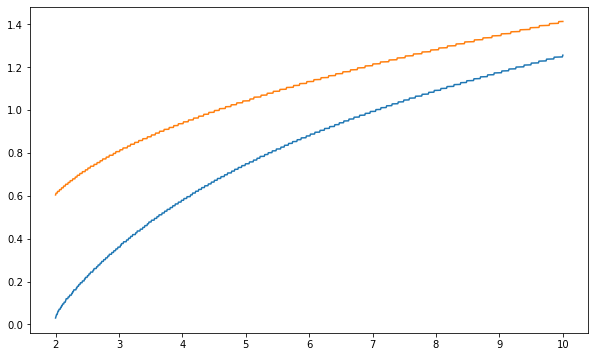

In [37]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, consumption_old.T)
plt.show()

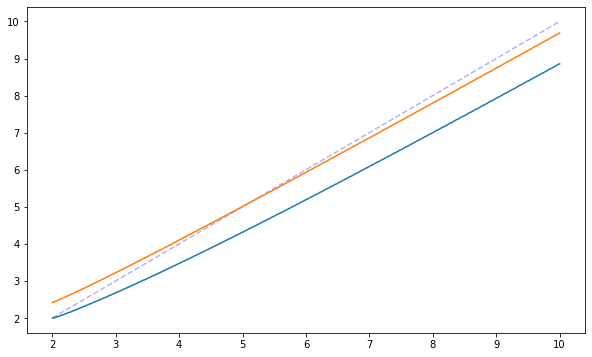

In [39]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, k_grid, 'b--', alpha = 0.3)
plt.plot(k_grid, policy_old.T)
plt.show()

In [40]:
# Make borrowing available?
n_k = 1000
k_min = 1.5
k_max = 10.0
k_grid = np.linspace(k_min, k_max, n_k)


In [41]:
%%time

# Vectorize some operations
T = 1000
V = np.zeros((T, N, n_k))
consumption_new = np.zeros((N, n_k))
policy_new = np.zeros((N, n_k))

for i in range(T - 1):
    for j in range(N):
        for k in range(n_k):
            c_grid = R * k_grid[k] + y_grid[j] - k_grid
            tmp = u_vec(c_grid, gamma) + beta * np.dot(Pi[j, :], V[i, :, :])
            V[i + 1, j, k] = np.max(tmp)
            policy_new[j, k] = k_grid[np.argmax(tmp)]
            consumption_new[j, k] = R * k_grid[k] + y_grid[j] - policy_new[j, k]
            if (consumption_new[j, k] <= 0):
                consumption_new[j, k] = R * k_grid[k] + y_grid[j] - k_min
                policy_new[j, k] = k_min
    
    # Check convergence
    diff = np.max(np.abs(V[i + 1, :, :] - V[i, :, :]))
    if (diff < 1e-4):
        V_converge = V[i, :, :]
        print(f"Converge in {i} iterations")
        break

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


Converge in 246 iterations
Wall time: 37 s


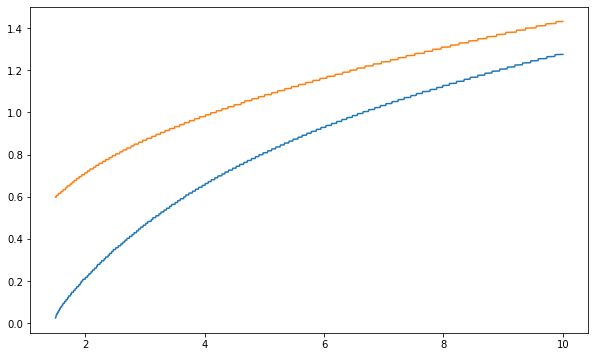

In [42]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, consumption_new.T)
plt.show()

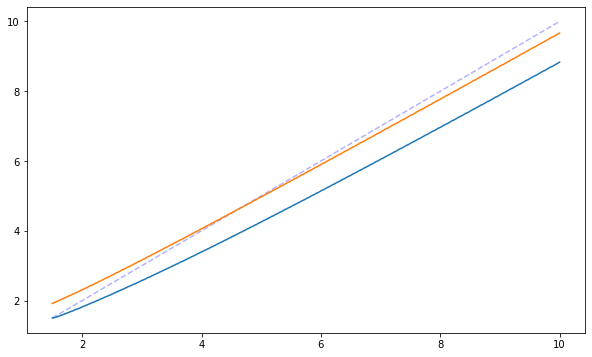

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, k_grid, 'b--', alpha = 0.3)
plt.plot(k_grid, policy_new.T)
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


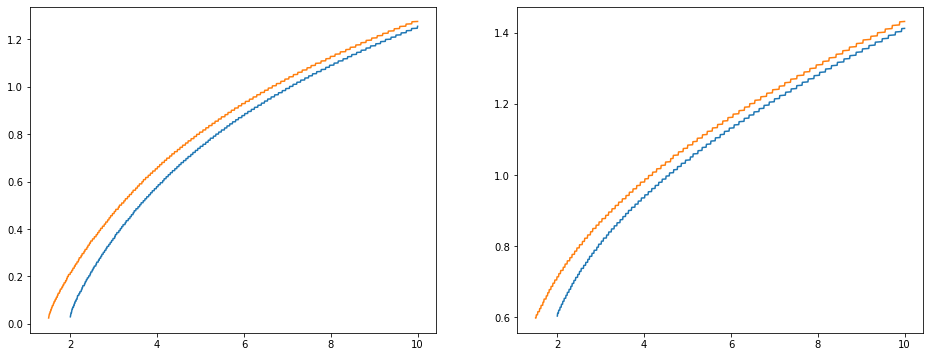

In [44]:
# Compare consumption in either cases

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
ax1.plot(np.linspace(2.0, 10.0, 1000), consumption_old[0, :])
ax1.plot(np.linspace(1.5, 10.0, 1000), consumption_new[0, :])
ax2.plot(np.linspace(2.0, 10.0, 1000), consumption_old[1, :])
ax2.plot(np.linspace(1.5, 10.0, 1000), consumption_new[1, :])
fig.show()

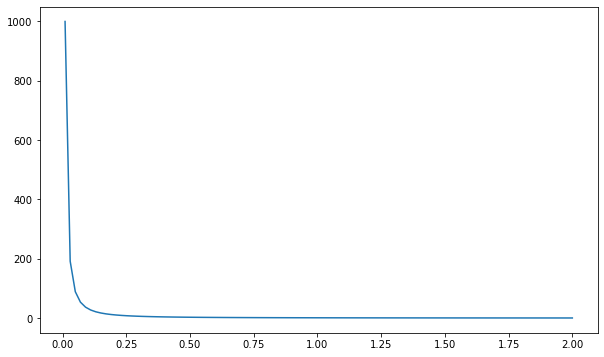

In [25]:
# Marginal utility of consumption

c_grid = np.linspace(0.01, 2, 100)
plt.figure(figsize = (10, 6))
plt.plot(c_grid, c_grid ** (-gamma))
plt.show()